## 6.5 - Advanced Topics

In [ ]:
%matplotlib widget
from sympy import *
init_printing(use_latex=True)

### 6.5.1 - Structural Equality and Numbers

In [ ]:
Rational(5, 2) == Float(2.5)

In [ ]:
Float(2.0) == Integer(2) == Rational(2)

In [ ]:
a = 2.0
b = 2
type(a), type(b)

In [ ]:
a == b, hash(a), hash(b)

In [ ]:
c = Float(2)
d = Integer(2)
c == d, type(c), type(d)

In [ ]:
hash(c), hash(d)

In [ ]:
a == c, b == d

In [ ]:
{a, c}

### 6.5.5 - The AssocOp class - Argument Evaluation

In [ ]:
x = symbols("x")
expr = 2 + x + 3 * x - 1
expr

In [ ]:
x = Symbol("x")
expr1 = Add(2, Add(x, 3), evaluate=False)
expr2 = Add(2, Add(x, 3))
display(expr1, expr2)

### 6.5.6 - Polynomials and performance

#### Dense Multivariate Polynomial representation.

In [ ]:
x = symbols("x")
f = Poly(6*x**3 + 3*x**2 + x + 4)
print(f.rep)
display(f.as_expr())

In [ ]:
i = f - x
print(i.rep)
c1 = i.coeffs()
c2 = i.all_coeffs()
c3 = i.rep.rep
display(i, c1, c2, c3)

In [ ]:
x, y = symbols("x, y")
expr = x**2*y + x**2 + x*y + y - 1
p = Poly(expr, x)
p

In [ ]:
p.rep

In [ ]:
p1 = Poly(expr, x, y)
print(p1.rep)
display(p1)

#### Sparse Polynomial representation.

In [ ]:
t = symbols("t")
p2 = Poly(expr, t)
print(p2.rep)
print(type(p2.rep.rep[0]))
display(p2)

In [ ]:
dict(p2.rep.rep[0])

#### Performance of the Poly class.

In [ ]:
from sympy import *
init_printing(use_latex=True)
x, y, z = symbols("x:z")
from sympy.polys.orderings import monomial_key
monomials = sorted(itermonomials([x, y, z], 3, 0), key=monomial_key('lex', [z, y, x]))
monomials

In [ ]:
# Poly Class - DMP representation
t = symbols("t")
p_dense_DMP = Poly(sum(monomials))
p_dense50_DMP = Poly(sum([m for i, m in enumerate(monomials) if i % 2 == 1]))
p_dense30_DMP = Poly(sum([m for i, m in enumerate(monomials) if i % 3 == 0]))
p_sparse_DMP = Poly(x + y + z)
# Poly Class - Sparse representation
p_dense_Sparse = Poly(sum(monomials), t)
p_dense50_Sparse = Poly(sum([m for i, m in enumerate(monomials) if i % 2 == 1]), t)
p_dense30_Sparse = Poly(sum([m for i, m in enumerate(monomials) if i % 3 == 0]), t)
p_sparse_Sparse = Poly(x + y + z, t)

display(*[t.as_expr() for t in [p_dense_DMP, p_dense50_DMP, p_dense30_DMP, p_sparse_DMP]])

__NOTE:__ The *timeit* module is used to measure the execution time. In particular:

* `r` is the number of repeats, that is, how many times `timeit.Timer` is going to be executed.
* `n` is the number of executions of the main statement for each repeat.

For `p_dense_DMP, p_dense_S`, the computation becomes very slow when the exponent is greater than 20 (depending on our machine, of course). Hence, `r, n` are kept relatively low. Nonetheless, the following code block still needs several minutes of CPU time. Feel free to skip it and jumpt to the results.

In [ ]:
import timeit
from functools import partial

# the higher these numbers, the longer it takes to complete
r, n = 3, 3

exponent_list = list(range(5, 31, 5))
def func(p, e):
    p**e

times = []
for i, p in enumerate([
    p_dense_DMP, p_dense50_DMP, p_dense30_DMP, p_sparse_DMP,
    p_dense_Sparse, p_dense50_Sparse, p_dense30_Sparse, p_sparse_Sparse]):
    print(f"Evaluating polynomial {i + 1}: {p}")
    times.append(
        [min(timeit.Timer(partial(func, p, e)).repeat(repeat=r, number=n)) / n
            for e in exponent_list])
print(times)

In [ ]:
import matplotlib.pyplot as plt

def _plot(i, j, *axs, title=""):
    for ax in axs:
        ax.plot(exponent_list, times[i], 'o-', label="Poly DMP")
        ax.plot(exponent_list, times[j], '*:', label="Poly Sparse")
    axs[1].set_yscale("log")
    axs[1].set_xlabel("Exponent, n")
    axs[0].set_title(title)

fig, axs = plt.subplots(2, 4, layout='constrained')
_plot(0, 4, axs[0, 0], axs[1, 0], title="p_dense_*")
_plot(1, 5, axs[0, 1], axs[1, 1], title="p_dense50_*")
_plot(2, 6, axs[0, 2], axs[1, 2], title="p_dense30_*")
_plot(3, 7, axs[0, 3], axs[1, 3], title="p_sparse_*")
axs[0, 0].set_ylabel("Time [s]")
axs[1, 0].set_ylabel("Time [s]")
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles=handles, loc='outside lower center', ncol=3)
plt.show()

On the author's machine:

```py
times = [[0.0051877856664456585, 0.06434556933284814, 0.7301255503328624, 1.6243882273332322, 8.355428479333568, 25.829918795666647], [0.0031626113335126624, 0.0516847359995154, 0.6669770023333209, 1.4625776696666435, 7.8049532830003345, 24.833471777999875], [0.002525360333189989, 0.03605262866646323, 0.42177054599960684, 0.9695227123332492, 4.7901540780003415, 14.813447893666307], [0.0002533323331590509, 0.0012053196666480896, 0.0058202256665632985, 0.012218887666676892, 0.04130718600026739, 0.10420181999991958], [0.002544063000338307, 0.06412856966683951, 1.0547183329999825, 2.5213712000004307, 15.564129866999792, 53.76344056166636], [0.0009485273337001369, 0.028106702333388967, 0.5869069223335828, 1.39301257166638, 9.400174062666943, 34.62221006166692], [0.0003084679998816379, 0.005088013333079289, 0.06667715433347136, 0.1734358223335827, 1.031816491333302, 3.6772383186665443], [3.490999976444679e-05, 0.00011808799960514686, 0.00039943333346551907, 0.0007298043334837226, 0.0017542309997224947, 0.0035806366668111878]]
```

![image.png](attachment:image.png)

#### Large coefficients and gmpy2.

If `gmpy2` is present in our environment, SymPy’s polynomial module will
use gmpy2’s `mpz` type (multiple-precision integer), otherwise Python’s `int` will be used.
Depending on the platform and the specific operation, an `mpz` will be faster than Python’s
`int` once the precision exceeds 20 to 50 digits. Hence, the bigger the coefficients of a
polynomial, the faster the computation with gmpy2. Let’s find out the performance gain
with a simple example.

In [ ]:
from sympy import *
init_printing(use_latex=True)
import timeit
from functools import partial

x, y, z = symbols("x, y, z")
p = Poly(1234 * x + 123 * y + 12 * z + 1)
p

The benchmark consists in the exponentiation of the polynomial with an increasing expo-
nent. The bigger the exponent, the bigger the resulting coefficients. Note that we created
a polynomial with 3 indeterminates and a total degree of 1, using the DMP representation. Each exponentiation will create a fully dense polynomial, hence this is the best
representation for this particular benchmark.

In [ ]:
exponent_list = list(range(10, 31, 5))
def func(expr):
    factor(expr)

def do_test(p):
    r, n = 3, 3
    times = []
    for e in exponent_list:
        new_expr = p**e
        times.append(min(timeit.Timer(partial(func, new_expr)).repeat(repeat=r, number=n)) / n)
    return times

The benchmark code needs to be executed twice, with and without gmpy2 installed on the system.
Let's uninstall it, restart the kernel and perform the test.

In [ ]:
!pip uninstall -y gmpy2

In [ ]:
times_no_gmpy2 = do_test(p)
print(times_no_gmpy2)

Now, let's install it, restart the kernel and perform the test.

In [ ]:
!pip install gmpy2

In [ ]:
times_with_gmpy2 = do_test(p)
print(times_with_gmpy2)

Finally, plot the results:

In [ ]:
import matplotlib.pyplot as plt

times_no_gmpy2 = [0.08219280733464984, 0.39288315933420864, 2.5575064906685534, 11.717498931000591, 47.01095505166692]
times_with_gmpy2 = [0.07844529500046822, 0.2467654323336319, 0.9048305456672097, 1.9894147483355482, 3.951857888668504]
speedup = [u / v for u, v in zip(times_no_gmpy2, times_with_gmpy2)]
exponent_list = list(range(10, 31, 5))

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(exponent_list, times_no_gmpy2, 'o-', label="Python's int")
ax[0].plot(exponent_list, times_with_gmpy2, '^-', label="gmpy2's mpz")
ax[0].set_ylabel("Time [s]")
ax[0].set_xticks(exponent_list, exponent_list)
ax[0].legend()
ax[1].plot(exponent_list, speedup, 'o-')
ax[1].set_xlabel("Exponent, n")
ax[1].set_ylabel("Speedup")
fig.tight_layout()

On the author's machine:

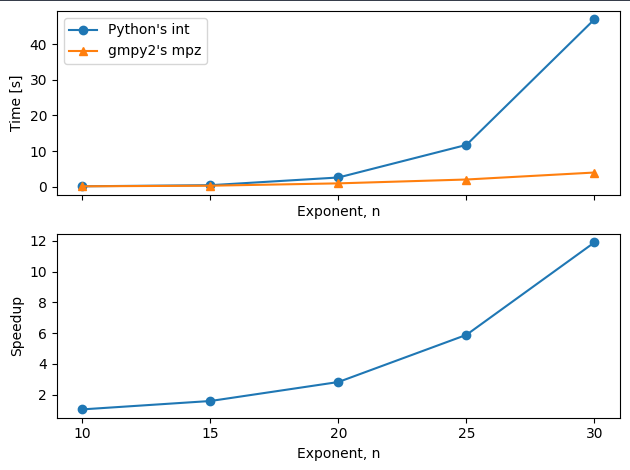

#### Numerical evaluation of large polynomials

In [ ]:
from sympy import *
import timeit
from functools import partial

def build_expr(m, x, y, r=3, n=10, time=True):
    memory = zeros(1, m + 1)
    memory[0] = 1
    x_times_y = x * y
    timings = {}
    
    def func(j, memory):
        f = [
            Rational(binomial(j, k)) * (x**(j + 1 - k) * y**(k * (j + 1 - k))) * memory[k] - x_times_y
            for k in range(j)
        ]
        return f, S.Half - sum(f)

    for j in range(1, m + 1):
        if timeit:
            t = min(timeit.Timer(partial(func, j, memory)).repeat(repeat=r, number=n)) / n
            timings[j] = t
        f, out = func(j, memory)
        memory[j] = out
        
    return f, timings

def buil_poly_dmp(m, x, y, r=3, n=10, time=True):
    memory = [Poly(0, x, y)] * (m + 1)
    memory[0] = Poly(1, x, y)
    x_times_y = Poly(x * y, x, y)
    timings = {}
    
    def func(j, memory):
        f = [
            Rational(binomial(j, k)) * Poly(x**(j + 1 - k) * y**(k * (j + 1 - k)), x, y) * memory[k] - x_times_y
            for k in range(j)
        ]
        return f, S.Half - sum(f, start=Poly(0, x, y))

    for j in range(1, m + 1):
        if timeit:
            t = min(timeit.Timer(partial(func, j, memory)).repeat(repeat=r, number=n)) / n
            timings[j] = t
        f, out = func(j, memory)
        memory[j] = out
    return f, timings

def buil_poly_sparse(m, x, y, r=3, n=10, time=True):
    t = symbols("t")
    memory = [Poly(0, t)] * (m + 1)
    memory[0] = Poly(1, t)
    x_times_y = Poly(x * y, t)
    timings = {}
    
    def func(j, memory):
        f = [
            Rational(binomial(j, k)) * Poly(x**(j + 1 - k) * y**(k * (j + 1 - k)), t) * memory[k] - x_times_y
            for k in range(j)
        ]
        return f, S.Half - sum(f, start=Poly(0, t))

    for j in range(1, m + 1):
        if timeit:
            _t = min(timeit.Timer(partial(func, j, memory)).repeat(repeat=r, number=n)) / n
            timings[j] = _t
        f, out = func(j, memory)
        memory[j] = out
        
    return f, timings

def buil_ring_sparse(m, x, y, r=3, n=10, time=True):
    K = QQ[x, y]
    x = K(x)
    y = K(y)
    memory = [K.zero] * (m + 1)
    memory[0] = K.one
    x_times_y = x * y
    timings = {}
    
    def func(j, memory):
        f = [
            binomial(j, k) * (x**(j + 1 - k) * y**(k * (j + 1 - k))) * memory[k] - x_times_y
            for k in range(j)
        ]  
        return f, 1/2 - sum(f, start=K.zero) 

    for j in range(1, m + 1):
        if timeit:
            t = min(timeit.Timer(partial(func, j, memory)).repeat(repeat=r, number=n)) / n
            timings[j] = t
        f, out = func(j, memory)
        memory[j] = out
    return f, timings

In [ ]:
m = 19
x, y = symbols("x, y")

# build polynomials
res1, timings1 = build_expr(m, x, y, n=1000)
res2, timings2 = buil_poly_dmp(m, x, y)
res3, timings3 = buil_poly_sparse(m, x, y)
res4, timings4 = buil_ring_sparse(m, x, y, n=100)

# verify that they produces the same result. Since the comparison
# cost time, just test one short intermediate result.
idx = 10 if m >= 20 else int(m / 2)
a = res1[idx].expand() == res2[idx].expr
b = res2[idx].expr == res3[idx].expr
c = res3[idx].expr == res4[idx].as_expr()
assert a and b and c
print("Everything is good, let's proceed!")

In [ ]:
import matplotlib.pyplot as plt
from sympy.polys.monomials import monomial_count
num_indeterminates = 2

sparsities = []
total_degrees = []
max_coefficients = []
for poly in res2:
    total_degree = poly.total_degree()
    total_degrees.append(total_degree)
    max_coefficients.append(max(abs(c) for c in poly.coeffs()))
    num_monomials = monomial_count(num_indeterminates, total_degree)
    sparsity = (len(poly.coeffs()) / num_monomials * 100).evalf()
    sparsities.append(sparsity)
    
xvals = list(timings1.keys())
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(xvals, sparsities)
ax[0].set_xticks(xvals, xvals)
ax[0].set_ylabel("Sparsity [%]")
ax[1].plot(xvals, total_degrees)
ax[1].set_xticks(xvals, xvals)
ax[1].set_ylabel("Total Degree")
ax[2].plot(xvals, max_coefficients)
ax[2].set_xticks(xvals, xvals)
ax[2].set_xlabel("Iteration, m")
ax[2].set_ylabel("Max Coefficient")
ax[2].set_yscale("log")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
ax[0].plot(timings1.keys(), timings1.values(), label="Expression")
ax[0].plot(timings2.keys(), timings2.values(), label="Poly - DMP")
ax[0].plot(timings3.keys(), timings3.values(), label="Poly - Sparse")
ax[0].plot(timings4.keys(), timings4.values(), label="Ring Poly")
ax[0].set_xlabel("Iteration, m")
ax[0].set_ylabel("Time [s]")
ax[0].legend()
ax[1].plot(timings1.keys(), timings1.values(), label="Expression")
ax[1].plot(timings2.keys(), timings2.values(), label="Poly - DMP")
ax[1].plot(timings3.keys(), timings3.values(), label="Poly - Sparse")
ax[1].plot(timings4.keys(), timings4.values(), label="Ring Poly")
ax[1].set_xlabel("Iteration, m")
ax[1].set_ylabel("Time [s]")
ax[1].set_yscale("log")
fig.tight_layout()
plt.show()

On the author's machine:

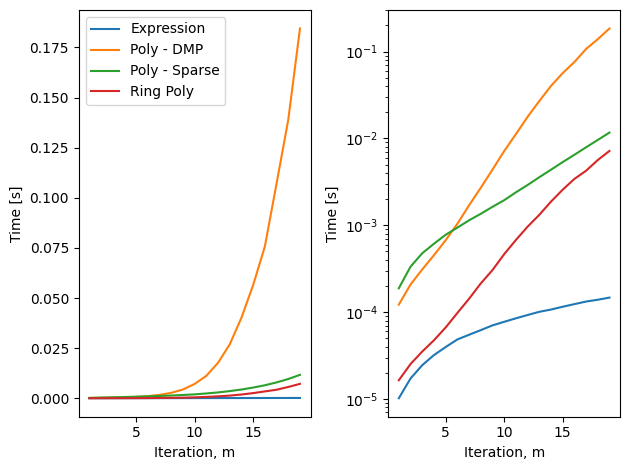

In [ ]:
from sympy.printing.pycode import SymPyPrinter

p = SymPyPrinter()
p._default_settings["sympy_integers"] = True

idx = -1
t1 = timeit.default_timer()
f1 = lambdify([x, y], res1[idx], {"S": S}, printer=p)
t2 = timeit.default_timer()
print("time to lambdify expr:", t2 - t1)

f2 = lambdify([x, y], res1[idx], {"S": S}, printer=p, cse=True)
t3 = timeit.default_timer()
print("time to lambdify expr with cse:", t3 - t2)

expanded = res1[idx].expand()
t4 = timeit.default_timer()
print("time to expand expr:", t4 - t3)

f3 = lambdify([x, y], expanded, {"S": S}, printer=p)
t5 = timeit.default_timer()
print("time to lambdify expanded expr:", t5 - t4)

f4 = lambdify([x, y], expanded, {"S": S}, printer=p, cse=True)
t6 = timeit.default_timer()
print("time to lambdify expanded expr with cse:", t6 - t5)

In [ ]:
a, b, c, d = f1(6, 7), f2(6, 7), f3(6, 7), f4(6, 7)
assert all(isinstance(t, Integer) for t in [a, b, c, d])
print("Everything is fine, proceed!")

In [ ]:
x_val = Integer(6)
y_val = Integer(7)
integer_eval = {}

print("evaluating f1")
r, n = 7, 10
integer_eval["f1"] = min(timeit.Timer(partial(f1, x_val, y_val)).repeat(repeat=r, number=n)) / n

print("evaluating f2, f3, f4")
n = 100
integer_eval["f2"] = min(timeit.Timer(partial(f2, x_val, y_val)).repeat(repeat=r, number=n)) / n
integer_eval["f3"] = min(timeit.Timer(partial(f3, x_val, y_val)).repeat(repeat=r, number=n)) / n
integer_eval["f4"] = min(timeit.Timer(partial(f4, x_val, y_val)).repeat(repeat=r, number=n)) / n

print("evaluating poly-dmp")
f = lambda x_val, y_val: res2[-1].eval({x: x_val, y: y_val})
integer_eval["poly-dmp"] = min(timeit.Timer(partial(f, x_val, y_val)).repeat(repeat=r, number=n)) / n

print("evaluating poly-sparse")
n = 10
def f(poly, x_val, y_val):
    expr = poly.eval(0)
    expr.subs({x: x_val, y: y_val})
integer_eval["poly-sparse"] = min(timeit.Timer(partial(f, res3[-1], x_val, y_val)).repeat(repeat=r, number=n)) / n

print("evaluating ring-sparse")
n = 1000
from gmpy2 import mpz
K = QQ[x, y]
xr = K(x)
yr = K(y)
f = lambda x_val, y_val: res4[-1].evaluate([(xr, mpz(6)), (yr, mpz(7))])
integer_eval["ring-sparse"] = min(timeit.Timer(partial(f, x_val, y_val)).repeat(repeat=r, number=n)) / n

integer_eval

In [ ]:
x_val = Rational(6, 7)
y_val = Rational(7, 5)
rational_eval = {}

print("evaluating f1")
r, n = 7, 10
rational_eval["f1"] = min(timeit.Timer(partial(f1, x_val, y_val)).repeat(repeat=r, number=n)) / n

print("evaluating f2")
n = 1000
rational_eval["f2"] = min(timeit.Timer(partial(f2, x_val, y_val)).repeat(repeat=r, number=n)) / n

print("evaluating f3, f4")
n = 100
rational_eval["f3"] = min(timeit.Timer(partial(f3, x_val, y_val)).repeat(repeat=r, number=n)) / n
rational_eval["f4"] = min(timeit.Timer(partial(f4, x_val, y_val)).repeat(repeat=r, number=n)) / n

print("evaluating poly-dmp")
f = lambda x_val, y_val: res2[-1].eval({x: x_val, y: y_val})
rational_eval["poly-dmp"] = min(timeit.Timer(partial(f, x_val, y_val)).repeat(repeat=r, number=n)) / n

print("evaluating poly-sparse")
n = 10
def f(poly, x_val, y_val):
    expr = poly.eval(0)
    expr.subs({x: x_val, y: y_val})
rational_eval["poly-sparse"] = min(timeit.Timer(partial(f, res3[-1], x_val, y_val)).repeat(repeat=r, number=n)) / n

print("evaluating ring-sparse")
n = 1000
from gmpy2 import mpq
K = QQ[x, y]
xr = K(x)
yr = K(y)
f = lambda x_val, y_val: res4[-1].evaluate([(xr, mpq(6, 7)), (yr, mpq(7, 5))])
rational_eval["ring-sparse"] = min(timeit.Timer(partial(f, x_val, y_val)).repeat(repeat=r, number=n)) / n

rational_eval

In [ ]:
import numpy as np
height = 0.30
y = np.arange(len(integer_eval)) + 1

fig, ax = plt.subplots()
rects1 = ax.barh(y - height / 2, list(integer_eval.values()), height, label='integer')
rects2 = ax.barh(y + height / 2, list(rational_eval.values()), height, label='rational')
ax.bar_label(rects1, padding=10, fmt='%.2E')
ax.bar_label(rects2, padding=10, fmt='%.2E')
ax.set_xscale("log")
ax.set_xlabel("Time [s]")
ax.set_yticks(y)
ax.set_yticklabels(integer_eval.keys())
ax.invert_yaxis()
ax.set_xlim(None, 10)
ax.legend()
plt.show()

On the author's machine:

```py
integer_eval = {
    'f1': 1.0278656852002315,
    'f2': 0.00042393599600109157,
    'f3': 0.01426915947100133,
    'f4': 0.00783072205999997,
    'poly-dmp': 0.0019291659419977804,
    'poly-sparse': 0.3907891441001993,
    'ring-sparse': 0.0009084658569991006
}
rational_eval = {
    'f1': 1.1952454024998587,
    'f2': 0.0005795310959983908,
    'f3': 0.04565403132000938,
    'f4': 0.0382136493500002,
    'poly-dmp': 0.001983882140011701,
    'poly-sparse': 0.3171098947001155,
    'ring-sparse': 0.0017916796630015597
}
```

![image.png](attachment:image.png)

In [ ]:
m = 25
x, y = symbols("x, y")

# build polynomials
res5, timings1 = build_expr(m, x, y, time=False)
res6, timings4 = buil_ring_sparse(m, x, y, time=False)

# verify that they produces the same result. Since the comparison
# cost time, just test one short intermediate result.
idx = 10 if m >= 20 else int(m / 2)
assert res5[idx].expand() == res6[idx].as_expr()
print("Everything is good, let's proceed!")

In [ ]:
from sympy.printing.pycode import SymPyPrinter

p = SymPyPrinter()
p._default_settings["sympy_integers"] = True

start = timeit.default_timer()
f5 = lambdify([x, y], res5[-1], {"S": S}, printer=p, cse=True)
end = timeit.default_timer()
print("time to lambdify expr with cse:", end - start)
assert isinstance(f5(6, 7), Integer)
print("Everything is good, let's proceed!")

In [ ]:
x_val = Integer(6)
y_val = Integer(7)
integer_eval = {}
r = 3

print("evaluating f5")
n = 100
integer_eval["f5"] = min(timeit.Timer(partial(f5, x_val, y_val)).repeat(repeat=r, number=n)) / n

print("evaluating ring-sparse")
n = 1000
from gmpy2 import mpz
K = QQ[x, y]
xr = K(x)
yr = K(y)
f = lambda x_val, y_val: res6[-1].evaluate([(xr, mpz(6)), (yr, mpz(7))])
integer_eval["ring-sparse"] = min(timeit.Timer(partial(f, x_val, y_val)).repeat(repeat=r, number=n)) / n

integer_eval